<font size=5  color=#003366> <b>[LELEC2900] - Signal Processing <br><br> 
Python03 - The Discrete Fourier Transform</b> </font> <br><br><br>

<font size=5  color=#003366>
Prof. L. Vandendorpe<br>
Prof. L. Jacques
<br><br>
Anne-Sophie Collin (anne-sophie.collin@uclouvain.be)<br> 
Florian Quatresooz (florian.quatresooz@uclouvain.be) <br>
<br><br>
</font>

The objective of this session is to illustrate the theoretical concepts that have been covered in the chapter about the discrete Fourier transform. The exercises follow the same order as the related sections of the slides.

For each exercise, a reference will therefore be made to:
- the corresponding slides of the lecture
- the corresponding pages of the syllabus

<font size=5 color=#009999> <b>1. Continuous and discrete Fourier transform</b> </font> <br> <br>

<div class="alert alert-info">
<b>REFERENCES</b> 
<ul>   
<li> Lecture, slides 10 to 17 </li>
<li> Syllabus, pages 103-106</li>
</ul>
</div>

The cell below contains a reminder of a few properties of the Fourier Transform (in continuous time). An approximation of the exact transform is made by the <samp>cft</samp> function provided in the cft.py file. 

<b>Try to answer the following questions before running the cell below. Then verify the validity of your answers after running the cell. </b>

Let us consider a triangle function (first figure) and its Fourier Transform, a squared cardinal sine function. 
<ol>
   <li> What should be the Fourier transform of a periodic version (period $T$) of this triangle? Can you mathematically characterize this phenomenon (provide exact values depending of $T$)?;
   <li> In the time domain, multiply the periodic version of the triangle with a rectangular window whose width is an integer multiple of the period $T$. How does it impact the Fourier Transform? Which property of the Fourier Transform can explain this phenomenon? 
</ol>


<div class="alert alert-info">
<b>LAMBDA FUNCTIONS</b>  <br>
Do not be afraid by our way to define the signals. We used [lambda functions](https://realpython.com/python-lambda/) which is another way of defining functions. 
</div>

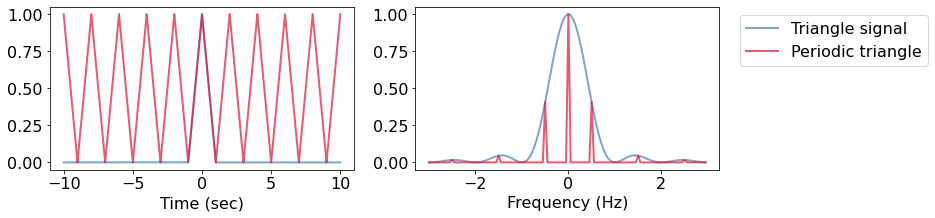

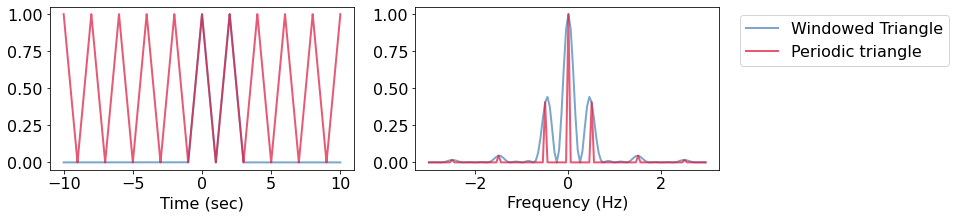

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np 
from scipy.integrate import simps
import matplotlib.pyplot as plt

from cft import cft 
from make_graphs import *

import warnings
warnings.filterwarnings('ignore')


triangle                   = lambda t: (1-abs(t)) * (abs(t)<1).astype(float) # Triangle Signal 
periodic_triangle          = lambda t: triangle(np.mod(t+1, 2)-1)            # Periodic Triangle Signal 
rectangle                  = lambda t: (abs(t)<0.5).astype(float)            # Rectangular window
window                     = lambda t: rectangle((t-1)/4)
windowed_periodic_triangle = lambda t: periodic_triangle(t) * window(t)


Fs     = 10000
t      = np.arange(-10, 10, 1/Fs)
f      = np.arange(-3, 3, 1/20.)

tri, per_tri = triangle(t), periodic_triangle(t)
cft_tri      = cft(triangle, f)
# Energy correction /10, since the periodic signal has 10 periods (i.e. 10 times the power)
cft_per_tri  = cft(periodic_triangle, f)/10

tri_wtime = np.vstack((t, np.vstack((tri, per_tri)) ))
cft_wfreq = np.vstack((f, np.vstack((cft_tri, cft_per_tri)) ))

plot_cft(tri_wtime, cft_wfreq, ['Triangle signal', 'Periodic triangle'], True)

windowed_tri     = windowed_periodic_triangle(t)
cft_windowed_tri = cft(windowed_periodic_triangle, np.arange(-3, 3, 1/20.))/2

tri_wtime = np.vstack((t, np.vstack((windowed_tri, per_tri)) ))
cft_wfreq = np.vstack((f, np.vstack((cft_windowed_tri, cft_per_tri)) ))

plot_cft(tri_wtime, cft_wfreq, ['Windowed Triangle', 'Periodic triangle'], True)


<div class="alert alert-warning">
<b>FEEDBACK</b>  <br>
The spectrum of the periodic signal tends to something discrete (with peaks that resemble delta functions in some way). These red peaks take the same values the as the blue continuous spectrum. In other words, the red spectrum of the periodic signal tends to a sampled version of the blue continuous spectrum. The periodic signal has a period $T=2$, i.e. it is repeated every $T=2$ seconds. Accordingly, its spectrum is non-zero every $1/T=0.5Hz$. <br> <br>

When this periodic signal is multiplied by a rectangular window, the spectrum becomes continuous again, but it crosses the value at the discrete points from the periodic signal. Mathematically, this is explained by the fact that multiplication in time-domain (i.e. windowing by the rect function of width $T=4$) relates to convolution in frequency domain (i.e. convolution with a sinc-function that has zeros every $F=1/T=0.25Hz$, see red curve).
</div>

<div class="alert alert-info">
<b>COMPARISON WITH THE SLIDES</b>  <br>
In the framework of this course, we defined:  <br>

- the continuous time Fourier transform, which maps a continuous time function $f(t)$ to a continuous function $F(j\omega)$  <br>
- the discrete time Fourier transform (DTFT), which maps a discrete time function $f[n]$ to a continuous function $F(e^{j\Omega})$ <br>
- the discrete Fourier transform (DFT), which maps discrete time function $f[n]$ to a discrete function $F[k]$ <br> <br>

In the slides 10-17 (and in pages 103-106 of the syllabus), it is shown analytically that the DTFT of a discrete periodic signal is made of delta functions.

In this exercise, we have shown numerically that the continuous time Fourier transform of a signal made of M repetitions of the same pattern tends to delta functions as well. 
</div>

<font size=5 color=#009999> <b>2. When we do not take an integer number of periods...</b> </font> <br> <br>

<div class="alert alert-info">
<b>REFERENCES</b> 
<ul>   
<li> Lecture, slides 10 to 20 (for questions 1 and 2) + slide 23 (for question 3)</li>
<li> Syllabus, pages 103-109 (for questions 1 and 2) + page 111 (for question 3)</li>
</ul>  
</div>

The objective of this exercise is to study what happens when we do not take a number of points corresponding to an integer multiple of the period when computing the DFT of a discrete periodic signal.

Let us consider a cosine wave oscillating at 2 Hz with a sampling frequency of 50 Hz,
<ol>
   <li> Compute the DFT of the signal if you record it during 1 second. 
   <li> Compute the DFT of the signal if you now record it during 0.8 second. Which phenomenom do you observe? <br> 
(Nb: remember that the DFT assumes that the input is one period of a periodic signal)
   <li> When we compute de DFT of the cosine wave of 0.8 seconds duration, we do not recover the exact value of 2 Hz (the sampling of the frequencies are : [.., 0, 1.25, 2.5, 3.75, 5, 6.25, ...]. In such cases, interpolating in the Fourier domain enables to recover a better caracterization of the signal in the Fourier domain. Employ zero padding to find the 2Hz peak in the DFT. 
</ol>



<div class="alert alert-warning">
<b>FEEDBACK</b>  <br>
<ol>
   <li> DFT when the the duration is equal to 2 periods.
<img src="FeedbackImgs/2_fig1.png" width = "1000">
   <li> DFT when the the duration is equal to 1.6 period.
<img src="FeedbackImgs/2_fig2.png" width = "1000">
   
   Taking a number of points that does not correspond to an integer multiple of a period results in spectral leakage. In signal processing, spectral leakage in the broad sense is defined as the occurence of new frequencies components due to an operation. In this exercise, we have observed that if we do not take an integer multiple of the period, power is spread across several frequencies, even if the original signal is single tone.

<img src="FeedbackImgs/2_fig3.png" width = "1000">    
The figure here above was not requested in the questions of the exercise. These two figures show that the corresponding continuous spectrum is the Fourier transform of a.
   <li> Zero padding has the effect of increasing the frequency resolution.
<img src="FeedbackImgs/2_fig4.png" width = "1000">
</ol>
</div>

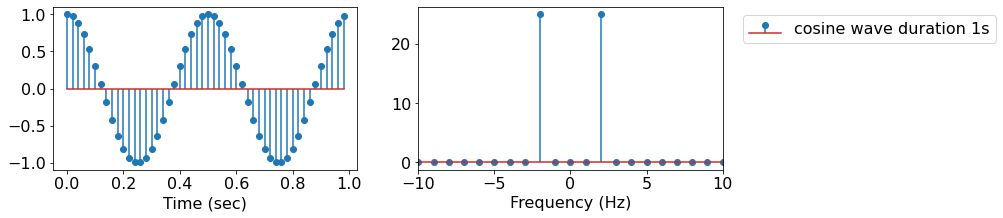

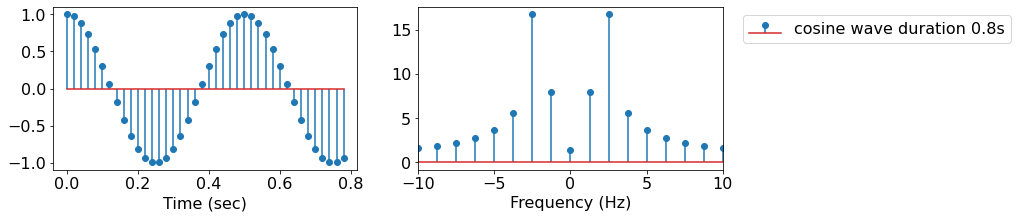

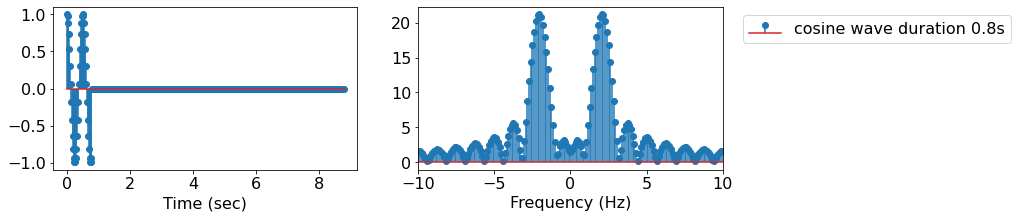

In [3]:
f = 2
fs = 50

t1 = np.arange(0, 1, 1/fs) 
y = np.cos(2*np.pi*f*t1)

fft1 = np.fft.fft(y)
fftfreqt1 = np.fft.fftfreq(len(y), 1/fs)

plot_dft(np.array([t1, y]), np.array([fftfreqt1, np.abs(fft1)]), ["cosine wave duration 1s"], True, lim=[-10, 10])

t2 = np.arange(0, 0.8, 1/fs) 
y2 = np.cos(2*np.pi*f*t2)

fft2 = np.fft.fft(y2)
fftfreqt2 = np.fft.fftfreq(len(y2), 1/fs)

plot_dft(np.array([t2, y2]), np.array([fftfreqt2, np.abs(fft2)]), ["cosine wave duration 0.8s"], True, lim=[-10, 10])

# zero pad signal
zeros = np.zeros(len(y2)*10)
ypad = np.concatenate((y2, zeros))
tpad = np.arange(0, 0.8+len(zeros)*(1/fs), 1/fs)

fftpad = np.fft.fft(ypad)
fftfreqpad = np.fft.fftfreq(len(ypad), 1/fs)

plot_dft(np.array([tpad, ypad]), np.array([fftfreqpad, np.abs(fftpad)]), ["cosine wave duration 0.8s"], True, lim=[-10, 10])

We observe spectral leakage because we don't have an integer number of period.

<font size=5 color=#009999> <b>3. Frequency ambiguity </b> </font> <br> <br>

Compute numerically and analytically the DFT of the 16-points signal 

$$ x(n) = cos(2 \pi F_0 n) $$

for the following two cases: 


1. when $F_0$ takes the value $\frac{3}{16} = 0.1875$ 
2. when $F_0$ takes the value $\frac{13}{16} = 0.8125$

Comment the results. 

Hints: to solve compute the DFT analytically, you will need

- The definition of the cosine as function of complex exponentials
- The orthogonality property of the complex exponentials (see syllabus p. 101)

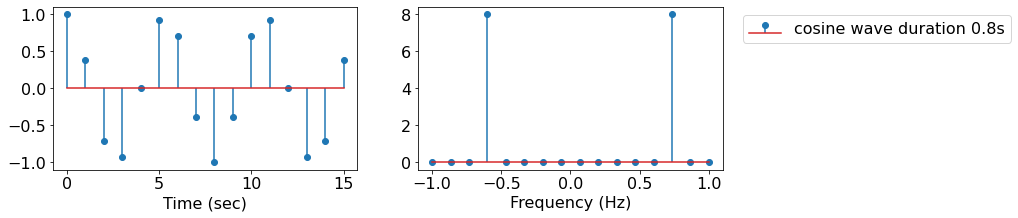

In [4]:
N = 16
F_0 = 3/16

n = np.arange(0, N, 1)
x = np.cos(2*np.pi*F_0*n)

fft = np.fft.fft(x)
fftfreq = np.linspace(-1, 1, N)

plot_dft(np.array([n, x]), np.array([fftfreq, np.abs(fft)]), ["cosine wave duration 0.8s"], show_fig=True)

<div class="alert alert-warning">
<b>FEEDBACK</b>  <br>
$$ \begin{split}
X (k)  & = \sum_{n=0}^{15} cos(2 \pi F_0 n)~ e^{-j\frac{2\pi k n}{16}} \\
& =  \sum_{n=0}^{15} \frac{1}{2} \left( e^{j 2 \pi F_0 n} + e^{-j 2 \pi F_0 n} \right) ~ e^{-j\frac{2\pi k n}{16}}\\
& = \frac{1}{2} \sum_{n=0}^{15} e^{-j 2\pi n \left(\frac{k}{16} - F_0 \right)} + e^{-j 2\pi n \left(\frac{k}{16} + F_0 \right)}\\
\end{split}
$$ 

Remind : 
$$ \sum_{n=0}^{N-1}  e^{-j 2\pi n \left(\frac{k-k_0}{N} \right)} = \begin{cases}
      N & \text{if } k-k_0 = iN~,i \in Z \\
      0 & \text{otherwise} 
    \end{cases}
$$ 


<span>&#8226;</span> $F_0 = \frac{3}{16}$ <br>
$$ \begin{split}
X_1 (k)  & = \frac{1}{2} \sum_{n=0}^{15}  e^{-j 2\pi n \left(\frac{k-3}{16} \right)} + e^{-j 2\pi n \left(\frac{k+3}{16} \right)} \\
& =  \frac{16}{2} \sum_{i \in Z}^{15}  e^{-j 2\pi n \left(\frac{k-3-16i}{16} \right)} + e^{-j 2\pi n \left(\frac{k+3-16i}{16} \right)} ~~~~~~\text{but with $-8 \leq k \leq 7$ and $k_0 = \pm 3$ }\\
& = 8 ~\delta(k-3) + 8 ~\delta(k+3)
\end{split}
$$ 

<span>&#8226;</span> $F_0 = \frac{13}{16}$ <br>
$$ \begin{split}
X_1 (k)  & = \frac{1}{2} \sum_{n=0}^{15}  e^{-j 2\pi n \left(\frac{k-13}{16} \right)} + e^{-j 2\pi n \left(\frac{k+13}{16} \right)} \\
& =  \frac{16}{2} \sum_{i \in Z}^{15}  e^{-j 2\pi n \left(\frac{k-13-16i}{16} \right)} + e^{-j 2\pi n \left(\frac{k+13-16i}{16} \right)} ~~~~~~\text{but with $-8 \leq k \leq 7$ and $k_0 = \pm 13$ }\\
& = 8 ~\delta(k-13+16) + 8 ~\delta(k-13-16) \\
& = 8 ~\delta(k-3) + 8 ~\delta(k+3) \\
\end{split}
$$ 

Both signals have the same DFT but not the same FT...
</div>

<font size=5 color=#009999> <b>4. DFT of nonperiodic signals: windowing operation </b> </font> <br> <br>

<div class="alert alert-info">
<b>REFERENCES</b> 
<ul>
<li> Lecture, slides 34 to 43 </li>
<li> Syllabus, pages 122 to 127 </li>
</ul>    
</div>

Since the DFT takes a finite number of points as input, a discrete signal of infinite length must be truncated in some way before applying this operator.

A natural way to proceed is to select points of signal contained in a finite interval. In other words, the signal can be multiplied by a rectangular window corresponding to the interval. However, multiplying a signal in the time domain by a rectangular window is equivalent to convolving its spectrum with a cardinal sine function. This means that energy of the original spectrum is widely spread. This is phenomenom is called spectral leakage (energy leaked from the main frequency component). 

The reason for such energy spreading to higher frequencies is that the rectangular window causes discontinuity (or abrupt changes) at the edges of the window. Instead of using a rectangular window function to "extract" portion of the signal to analyse, it is often better to apply a smoother window function. For this reason, other windowing functions are defined in the literature.

<ol>
   <li> Generate and visualize the windowing signals and their DFT for Bartlett, Blackman, Hanning, Hamming and Kaiser windows; 
   <li> What is the meaning of the mentionned parameters ? Why are they important?; 
   <li> Determine a window that leads to a normalized frequency resolution $ \Delta F  \le 0.01 $ and a sidelobe level $ \Lambda \le -30dB $. How many samples do we need to acheve these requirements ?  
</ol>


<div class="alert alert-warning">
<b>FEEDBACK</b>  <br>
<ol>
   <li> a) Barlett Window
<img src="FeedbackImgs/3_fig1.png" width = "1000">
   b) Blackman Window
<img src="FeedbackImgs/3_fig2.png" width = "1000">
   c) Hanning Window 
<img src="FeedbackImgs/3_fig3.png" width = "1000">
   d) Hamming Window
<img src="FeedbackImgs/3_fig4.png" width = "1000">
   e) Kaiser Window
<img src="FeedbackImgs/3_fig5.png" width = "1000">
   f) rectangular Window
<img src="FeedbackImgs/3_fig6.png" width = "1000">
 <li> /
 <li> The maximum frequency resolution is obtained with rectangular window $\Delta F = \frac{1}{N}$ (half of the main lobe) but with a level of sidelobes $\lambda_i = -13 dB$. Then we have to choose an other windowing function.
The hamming window offers a frequency resolution of $\Delta F = \frac{2}{N}$ (width of the main lobe is $\frac{4}{N}$. Then, 
$$ \Delta F = \frac{2}{N} \leq 0.01$$
$$ N \geq 200$$ 
<img src="FeedbackImgs/3_fig7.png" width = "1000">
For Kaiser window (with default value for parameter Beta), we obtain $ N \geq 220$
</ol>
</div>

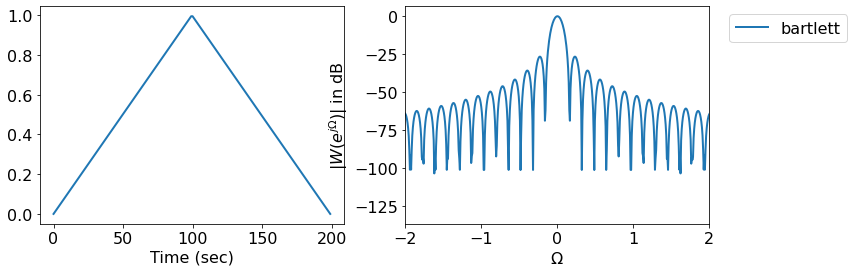

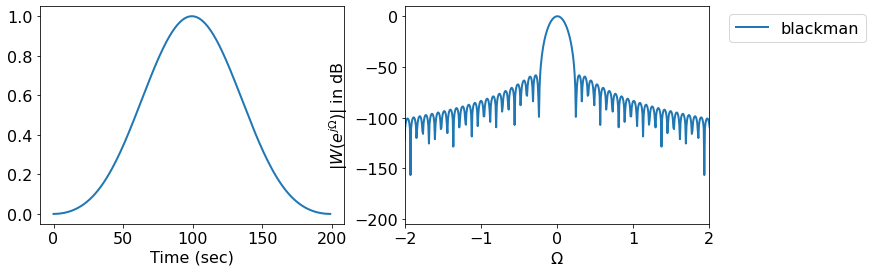

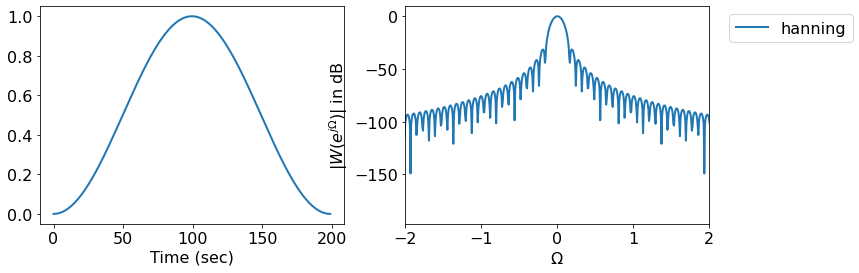

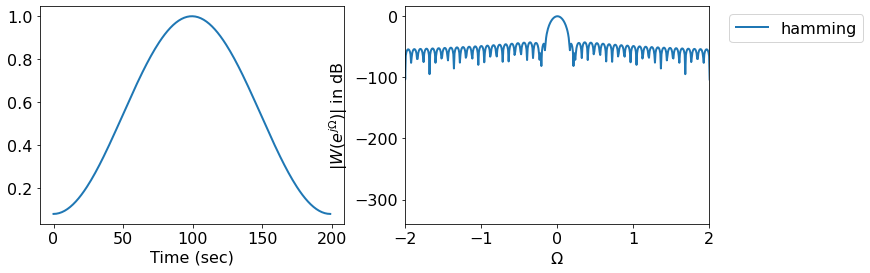

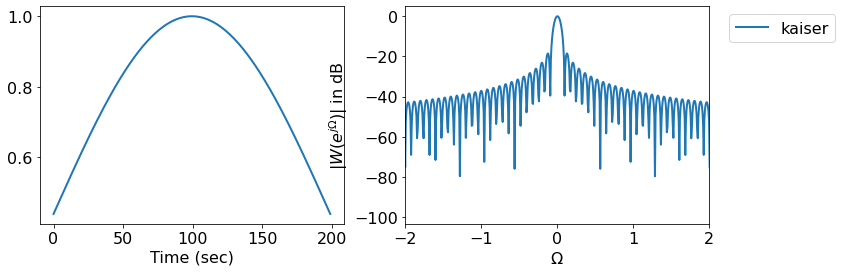

In [5]:
bartlett = np.bartlett(200)
blackman = np.blackman(200)
hanning = np.hanning(200)
hamming = np.hamming(200)
kaiser = np.kaiser(200, 2)
t = np.arange(0, 200, 1)

f = [bartlett, blackman, hanning, hamming, kaiser]
label = ["bartlett", "blackman", "hanning", "hamming", "kaiser"]
for ind, i in enumerate(f):
    fft = np.fft.fft(i, 2048)
    fft = np.fft.fftshift(fft)/np.max(fft)
    fftfreq = np.linspace(-8, 8, len(fft))

    plot_window([t,i], [fftfreq,20*np.log10(np.abs(fft))], label[ind], True, lim=[-2, 2])
    plt.show()

<font size=5 color=#009999> <b>5. Windowing - Application case </b> </font> <br> <br>

We consider the continuous time function $ f(t) = \frac{t^4}{4} e^{-t} $

<ol>
   <li> Compute a N-point DFT by making use of a rectangular window of length $T = 5 s$ , $N = 256$ being the number of samples taken between 0 and 5 s; 
   <li> What is the frequency resolution $\Delta f $ in Hz?; 
   <li> Illustrate two different ways of decreasing the sampling error. Compare them; 
   <li> Illustrate two different ways of decreasing $\Delta f $ and compare them; 
   <li> What is the effect of using a Hanning window instead of a rectangular one?;  
   <li> Compute the DFT with $N = 512$, assuming that the number of samples between 0 and 5 s is doubled. How are 256-point and 512-point DFT related? 
   <li> Compute the DFT with $N = 512$, assuming that the data is zero padded to 512. How are the 256 and the 512 point DFT related ? 
</ol>

<div class="alert alert-warning">
<b>FEEDBACK</b>  <br>
<ol>
Here is a plot of the considered signal (duration 10 sec) 
<img src="FeedbackImgs/4_fig1.png" width = "1000">
Here is a plot of the considered signal (duration 5 sec) 
<img src="FeedbackImgs/4_fig2.png" width = "1000">
</ol>
</div>

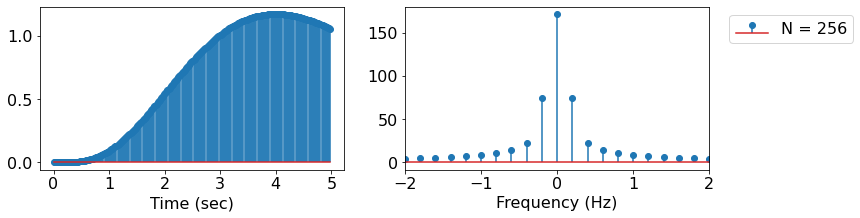

Frequency resolution : df = 1/(N*dt) = 0.2 [Hz]
How to decrease the sampling error
increase the sampling rate


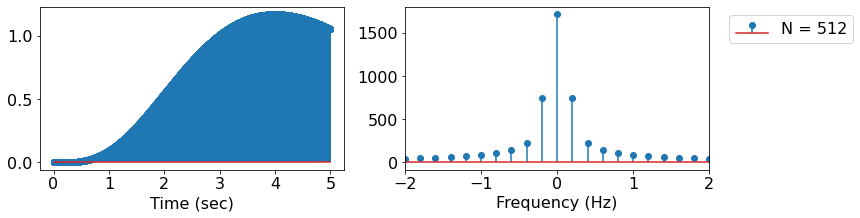

filter the signal


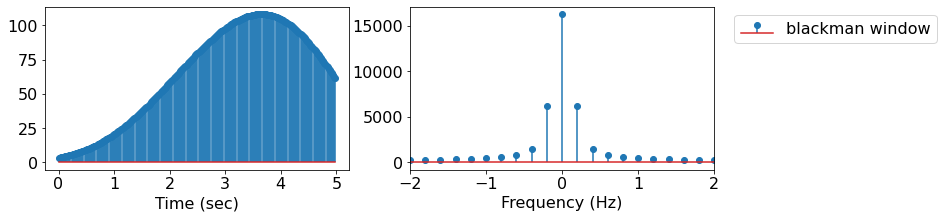

how to decrease df
zero padding


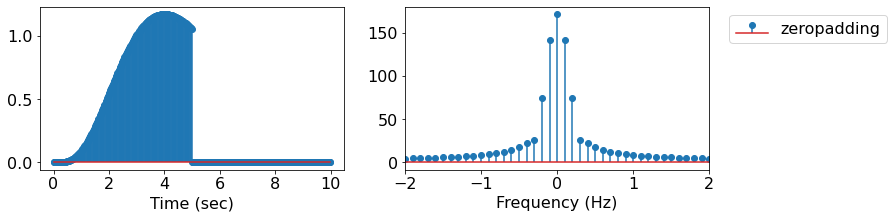

increase acquisition time


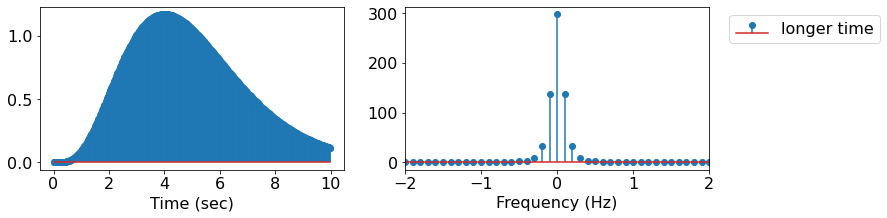

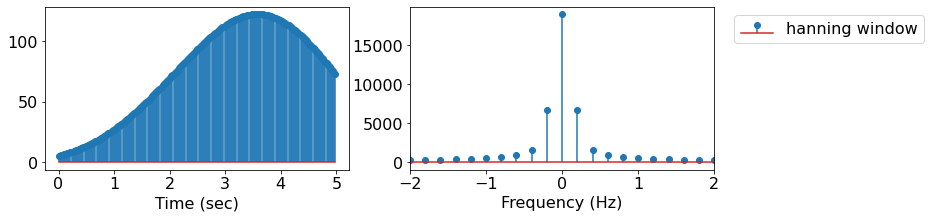

In [44]:
# 1 : N-point DFT
N = 256
t = np.arange(0, 5, 5/N)
f = (t**4)/4 * np.exp(-t)

fft = np.fft.fft(f)
fftfreq = np.fft.fftfreq(len(fft), 5/N)

plot_dft(np.array([t,f]), np.array([fftfreq,np.abs(fft)]), ["N = 256"], True, lim=[-2, 2])

# 2 : Frequency resolution
print(f'Frequency resolution : df = 1/(N*dt) = {1/(N*5/N)} [Hz]')

# 3 : 2-ways to decrease the sampling error
print("How to decrease the sampling error")


# increasing the number N 
print("increase the sampling rate")
N = 10*N
taug = np.arange(0, 5, 5/N)
faug = (taug**4)/4 * np.exp(-taug)

fft = np.fft.fft(faug)
fftfreq = np.fft.fftfreq(len(fft), 5/N)

plot_dft(np.array([taug,faug]), np.array([fftfreq,np.abs(fft)]), ["N = 512"], True, lim=[-2, 2])

# filter the signal
print("filter the signal")
N = 256
t = np.arange(0, 5, 5/N)
fil = (t**4)/4 * np.exp(-t)
h = np.blackman(N)
fil = np.convolve(fil, h, "same")

fft = np.fft.fft(fil)
fftfreq = np.fft.fftfreq(len(fft), 5/N)

plot_dft(np.array([t,fil]), np.array([fftfreq,np.abs(fft)]), ["blackman window"], True, lim=[-2, 2])

# 4 decrease df
print("how to decrease df")
# zero padding
print("zero padding")
zeros = np.zeros(N)
f = np.concatenate((f, zeros))
t = np.arange(0, 5+len(zeros)*5/N, 5/N)

fft = np.fft.fft(f)
fftfreq = np.fft.fftfreq(len(fft), 5/N)

plot_dft(np.array([t,f]), np.array([fftfreq,np.abs(fft)]), ["zeropadding"], True, lim=[-2, 2])

# increase acquisition time
print("increase acquisition time")
N = 256
t = np.arange(0, 10, 5/N)
f = (t**4)/4 * np.exp(-t)

fft = np.fft.fft(f)
fftfreq = np.fft.fftfreq(len(fft), 5/N)

plot_dft(np.array([t,f]), np.array([fftfreq,np.abs(fft)]), ["longer time"], True, lim=[-2, 2])

# 5 hanning window
N = 256
t = np.arange(0, 5, 5/N)
fil = (t**4)/4 * np.exp(-t)
h = np.hanning(N)
fil = np.convolve(fil, h, "same")

fft = np.fft.fft(fil)
fftfreq = np.fft.fftfreq(len(fft), 5/N)

plot_dft(np.array([t,fil]), np.array([fftfreq,np.abs(fft)]), ["hanning window"], True, lim=[-2, 2])
print("deformation of the temporal signal but reduces frequency distorsion ")